<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
# Read the Data
df = pd.read_csv("/content/drive/MyDrive/GeekLurn_ML_Session/wine_dataset.csv")

**EDA**

In [ ]:
df.shape

(6497, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [ ]:
df['style'].value_counts()

white    4898
red      1599
Name: style, dtype: int64

Converting Categorical to Numerical using OHE

In [ ]:
df1= pd.get_dummies(df['style'],drop_first= True)

In [ ]:
df2= pd.concat([df,df1], axis =1)

In [ ]:
df2.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,0


In [ ]:
df2.drop('style', axis =1, inplace = True)

In [ ]:
df2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
df2.rename(columns = {'white':'style'}, inplace = True)

In [ ]:
df2.tail(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
6487,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5,1
6488,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6,1
6489,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6,1
6490,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,1
6491,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5,1
6492,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
6496,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


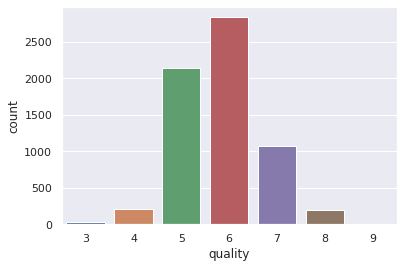

In [ ]:
sns.countplot(df2['quality'])

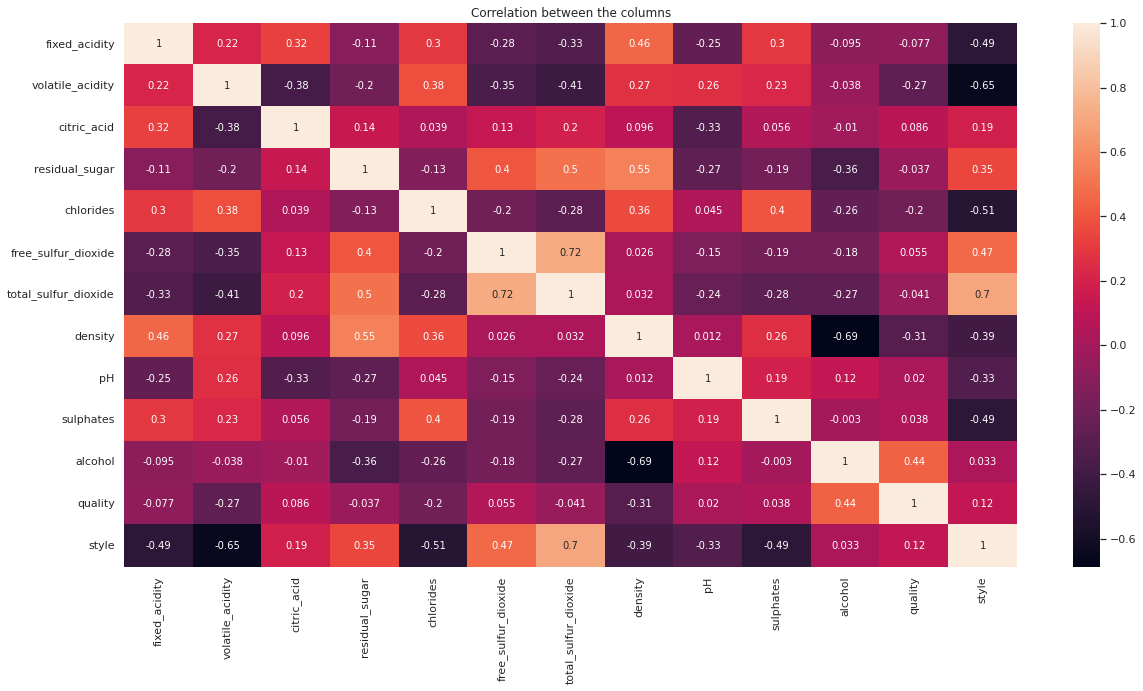

In [ ]:
corr = df2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.title("Correlation between the columns")
plt.show()

In [ ]:
df2.corr()['quality'].sort_values()

density                -0.305858
volatile_acidity       -0.265699
chlorides              -0.200666
fixed_acidity          -0.076743
total_sulfur_dioxide   -0.041385
residual_sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free_sulfur_dioxide     0.055463
citric_acid             0.085532
style                   0.119323
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

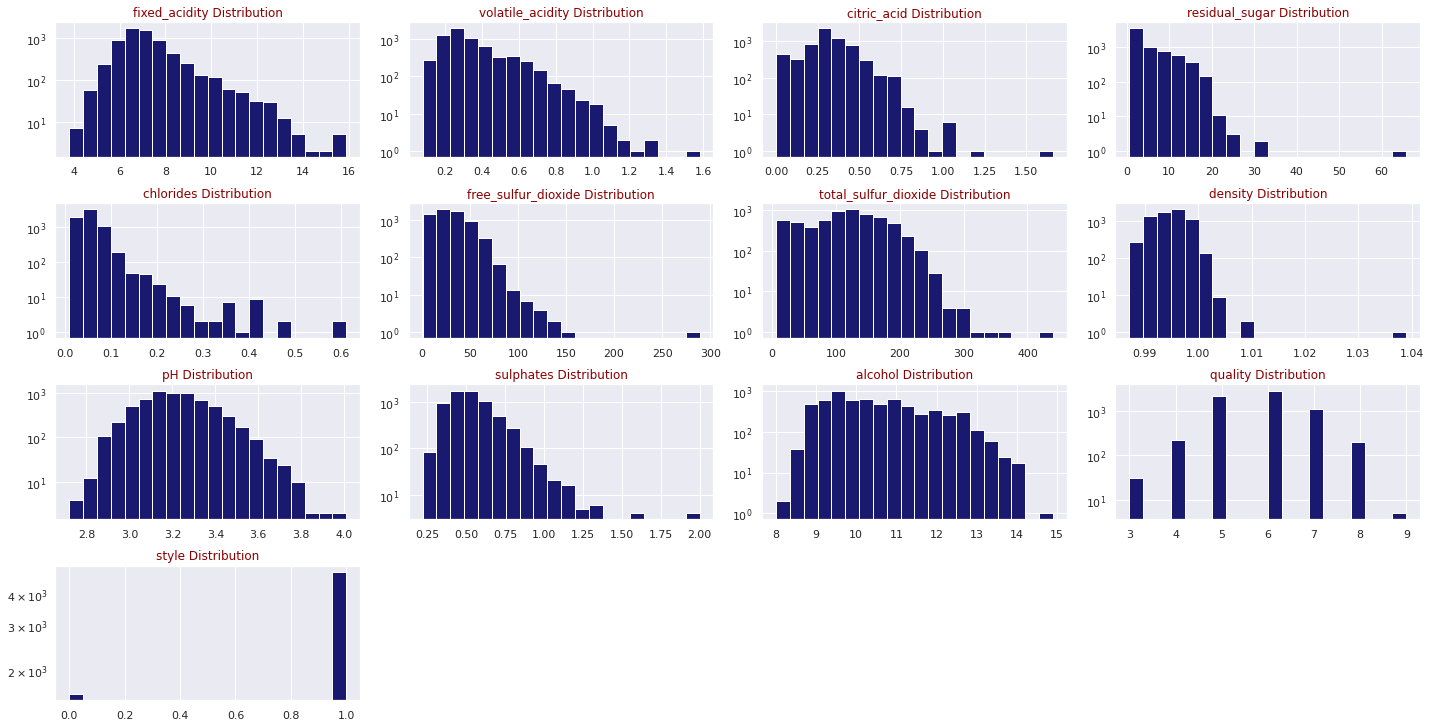

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df2,df2.columns,8,4)

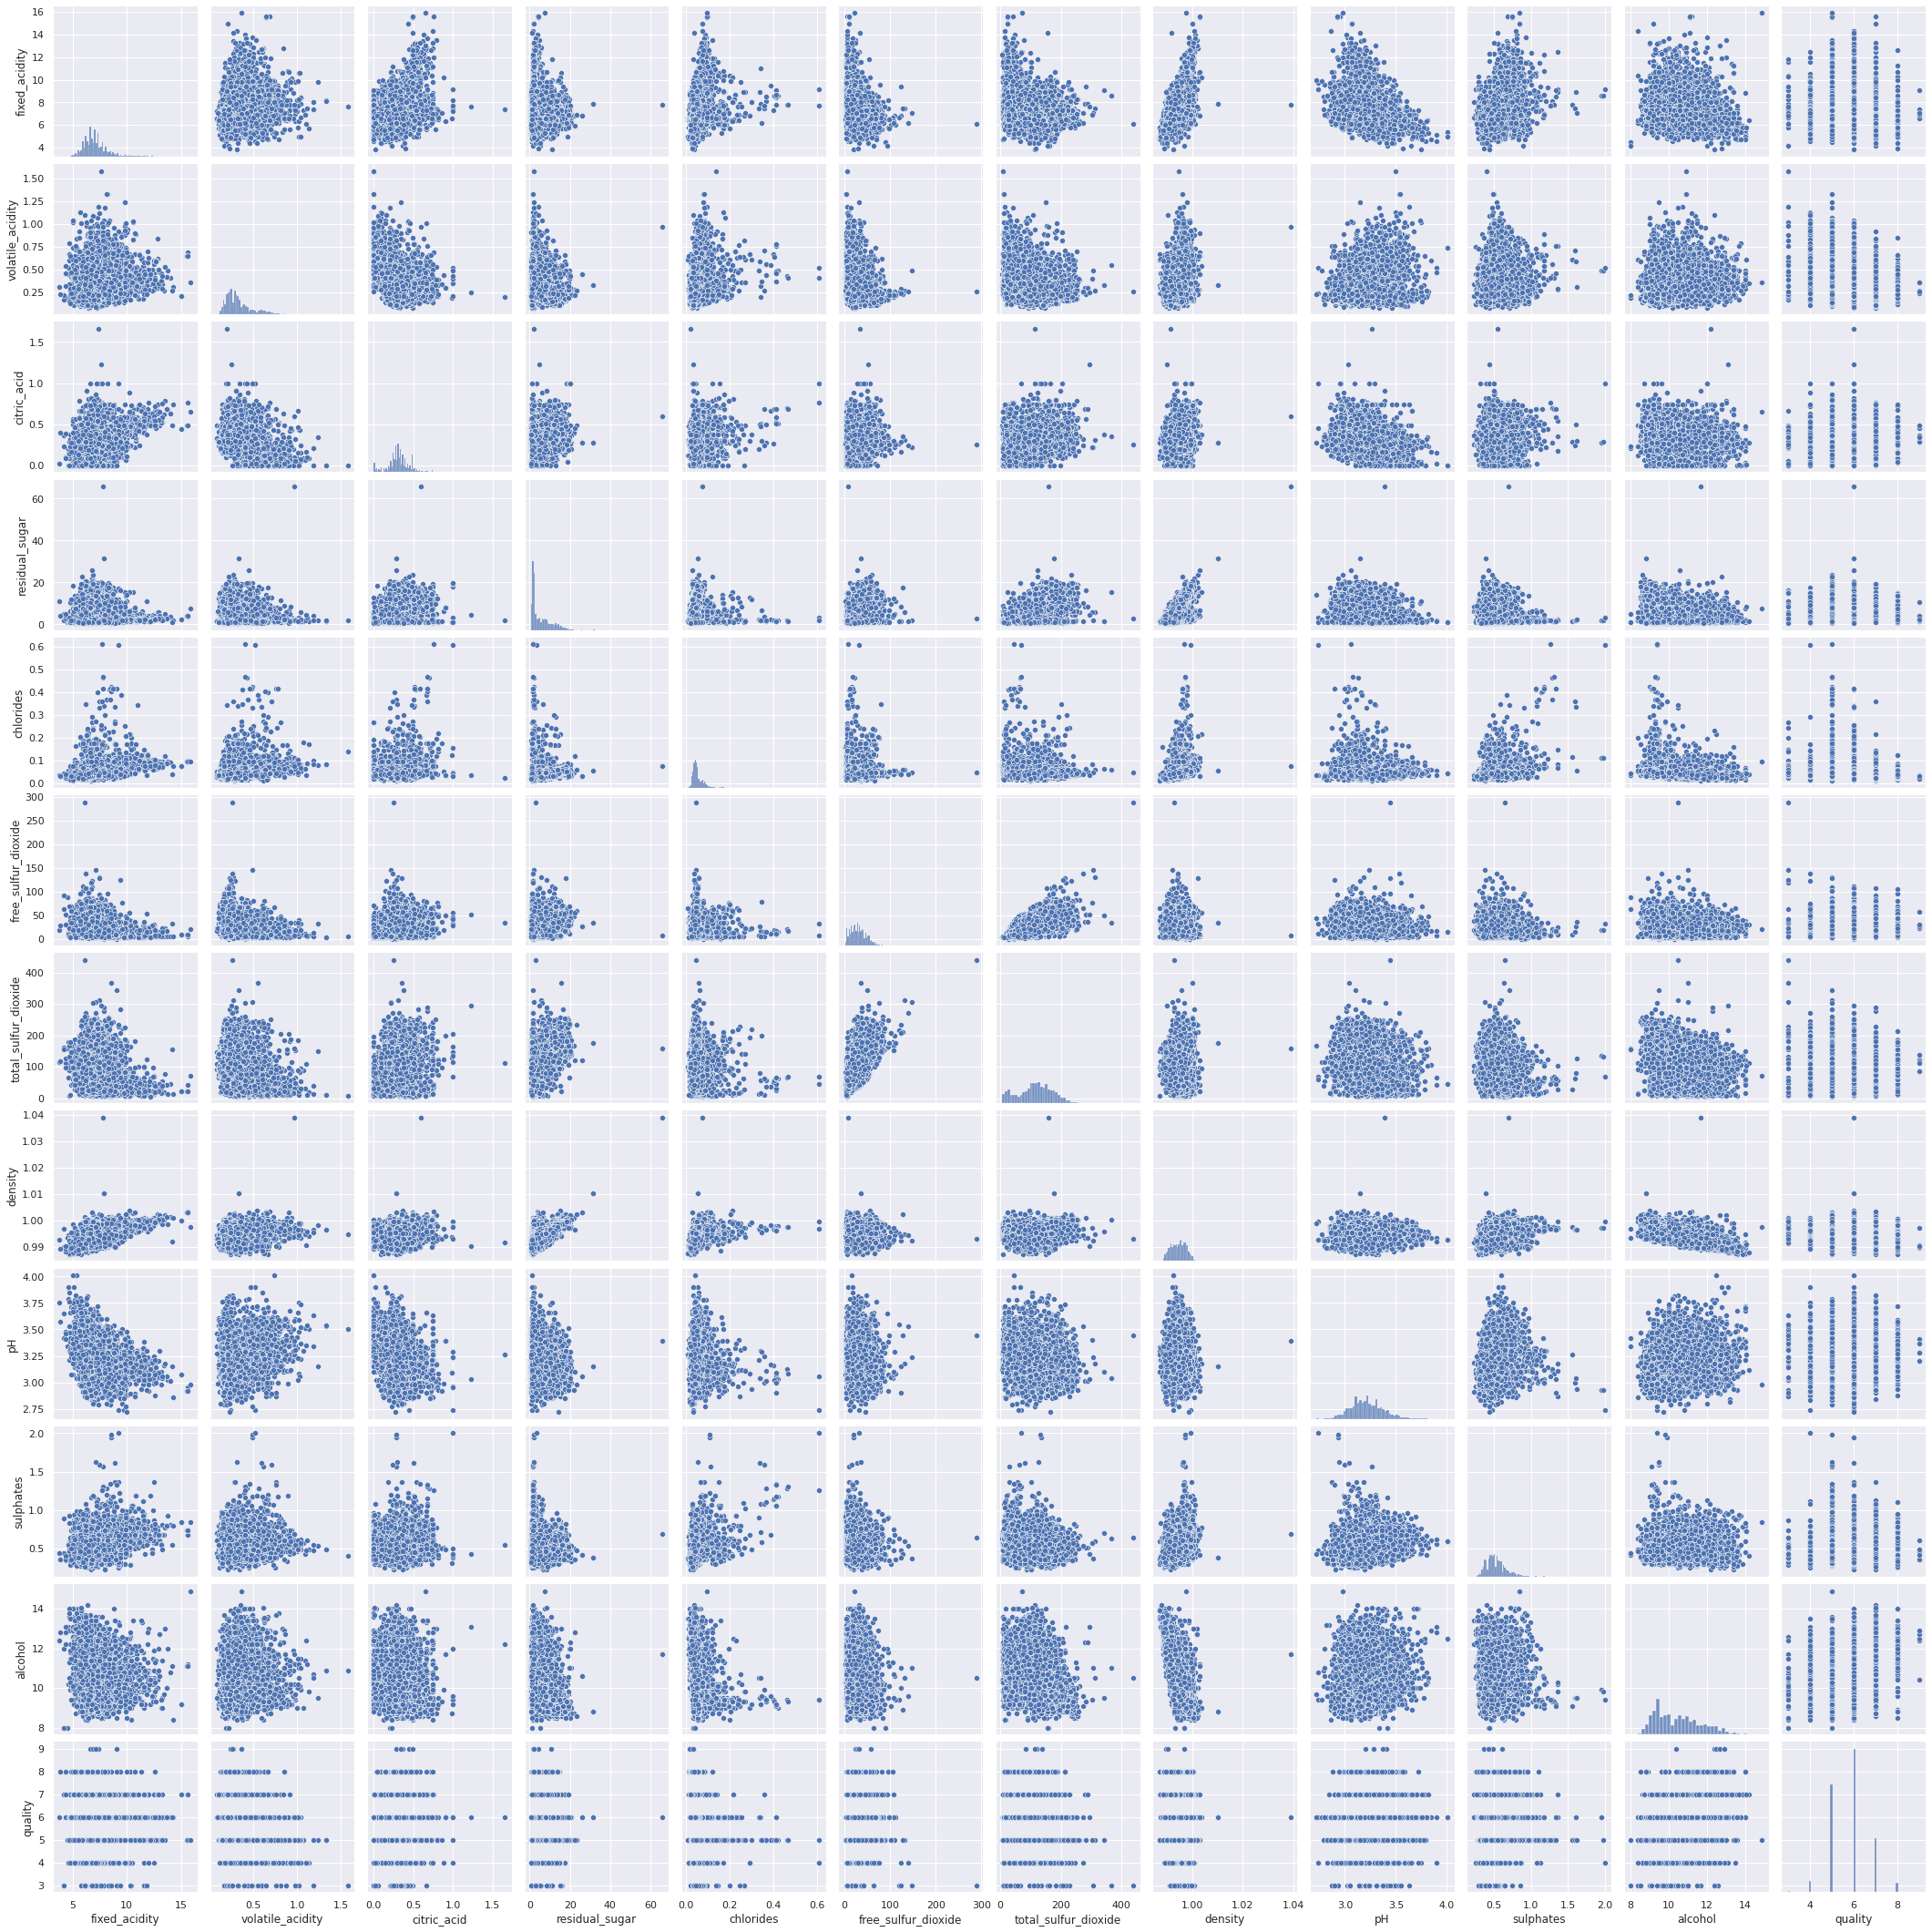

In [ ]:
sns.pairplot(df)

**Splitting X and Y**

In [ ]:
Y = df2['quality'].apply(lambda y:1 if y >=6 else 0)

In [ ]:
X = df2.drop(columns=['quality'], axis=1)

In [ ]:
Y.value_counts()

1    4113
0    2384
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


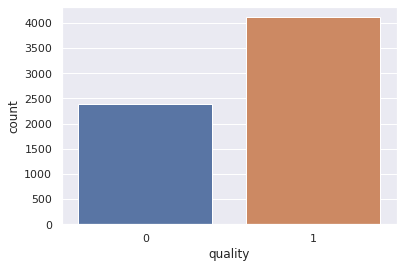

In [ ]:
sns.countplot(Y)

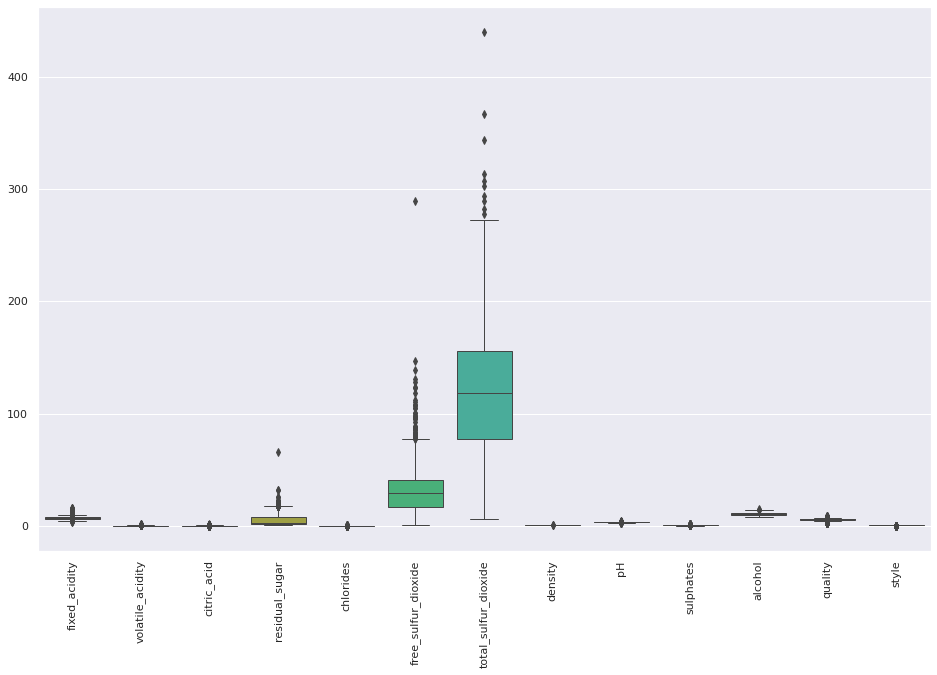

In [ ]:
#Checking the outliers
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df2, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'style'],
      dtype='object')

From the above box plot, we can obesrve that 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide' these features have many outliers

Below algorithms doesn't have much impact or not senstive to outliers. 

Naive Bayes, DT, SVM, Ensemble(RF, Bagging, XG boost)

Hence applying the data points as it is to above alogorithms without removing the outliers.

In [ ]:
df2.shape

(6497, 13)

In [ ]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scale = sc.fit_transform(X)

In [ ]:
#from sklearn import preprocessing
#scaler = preprocessing.RobustScaler()
#X_scale = scaler.fit_transform(X)

In [ ]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=0,stratify=Y)

In [ ]:
X_train.shape ,X_test.shape ,Y_train.shape,Y_test.shape

((4547, 12), (1950, 12), (4547,), (1950,))

**Balance the data using SMOTE**

In [ ]:
"""**SMOTE Sampling**"""
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_SM, Y_train_SM = sm.fit_resample(X_train, Y_train)

print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_SM)))

The number of classes before fit Counter({1: 2879, 0: 1668})
The number of classes after fit Counter({1: 2879, 0: 2879})


In [ ]:
"""**KNN**"""
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1, p=2) 

Knn = np.mean(cross_val_score(knn_clf,X_train_SM,Y_train_SM,scoring='accuracy',cv=10))
print(Knn)

0.857949577294686


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
knn_rs = RandomizedSearchCV(KNeighborsClassifier(), 
      {
        'n_neighbors': [1,3,5,6,7,8,9,11],
        'p': [1,2]
      }, 
    cv=10, 
    return_train_score=False, 
    n_iter=10
)
knn_rs.fit(X_train_SM,Y_train_SM)

pd.DataFrame(knn_rs.cv_results_)[['param_n_neighbors','param_p','mean_test_score']]

,param_n_neighbors,param_p,mean_test_score
0,9,2,0.784135
1,1,2,0.857950
2,1,1,0.857078
3,11,1,0.780834
4,5,1,0.802025
5,3,2,0.807930
6,7,2,0.788476
7,7,1,0.789176
8,8,2,0.782743
9,5,2,0.799069


In [ ]:
knnbest = knn_rs.best_estimator_
print(knnbest)

KNeighborsClassifier(n_neighbors=1)


at K =1 and Eucledean distance we get higher accuracy

In [ ]:
Y_pred_knn_SM = knnbest.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_knn_SM))
print(accuracy_score(Y_test,Y_pred_knn_SM))
print(classification_report(Y_test,Y_pred_knn_SM))

[[ 511  205]
 [ 208 1026]]
0.7882051282051282
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       716
           1       0.83      0.83      0.83      1234

    accuracy                           0.79      1950
   macro avg       0.77      0.77      0.77      1950
weighted avg       0.79      0.79      0.79      1950



**SVM**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import SVC
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear','poly']
}, cv=5, return_train_score=False)
clf.fit(X_train_SM,Y_train_SM)
clf.cv_results_

pd.DataFrame(clf.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.775792
1,1,linear,0.738104
2,1,poly,0.757902
3,10,rbf,0.793162
4,10,linear,0.737931
5,10,poly,0.764677
6,20,rbf,0.798374
7,20,linear,0.737931
8,20,poly,0.763463


In [ ]:
best_svm =clf.best_estimator_
print(best_svm)

SVC(C=20, gamma='auto')


In [ ]:
best_svm.fit(X_train_SM,Y_train_SM)
Y_pred_SVM = best_svm.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test,Y_pred_SVM))
print(accuracy_score(Y_test,Y_pred_SVM))
print(classification_report(Y_test,Y_pred_SVM))

[[557 159]
 [285 949]]
0.7723076923076924
              precision    recall  f1-score   support

           0       0.66      0.78      0.72       716
           1       0.86      0.77      0.81      1234

    accuracy                           0.77      1950
   macro avg       0.76      0.77      0.76      1950
weighted avg       0.78      0.77      0.78      1950



**Decesion Tree**

In [ ]:

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "gini", max_depth = 12)
dt.fit(X_train_SM,Y_train_SM)
Y_pred_dt_SM = dt.predict(X_test)


print(confusion_matrix(Y_test,Y_pred_dt_SM))
print(accuracy_score(Y_test,Y_pred_dt_SM))
print(classification_report(Y_test,Y_pred_dt_SM))

[[533 183]
 [306 928]]
0.7492307692307693
              precision    recall  f1-score   support

           0       0.64      0.74      0.69       716
           1       0.84      0.75      0.79      1234

    accuracy                           0.75      1950
   macro avg       0.74      0.75      0.74      1950
weighted avg       0.76      0.75      0.75      1950



In [ ]:
dt.tree_.node_count, dt.tree_.max_depth

(1039, 12)

In [ ]:
dt_score = []
md = range(1,12)
for i in md:
    dt = DecisionTreeClassifier(criterion = "gini", max_depth = i)
    dt.fit(X_train_SM,Y_train_SM)
    Y_pred_dt_SM = dt.predict(X_test)
    dt_score.append(accuracy_score(Y_test,Y_pred_dt_SM))

print(dt_score)

[0.6256410256410256, 0.7061538461538461, 0.6846153846153846, 0.6984615384615385, 0.7246153846153847, 0.7271794871794872, 0.7184615384615385, 0.7241025641025641, 0.7220512820512821, 0.7225641025641025, 0.7369230769230769]


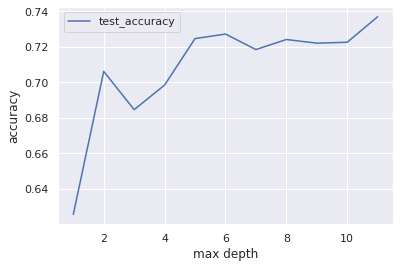

In [ ]:
plt.plot(md,dt_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("max depth")
plt.legend()

**Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator = dt, max_samples = 0.9)
bag.fit(X_train_SM,Y_train_SM)
Y_pred_bag_SM = bag.predict(X_test)


print(confusion_matrix(Y_test,Y_pred_bag_SM))
print(accuracy_score(Y_test,Y_pred_bag_SM))
print(classification_report(Y_test,Y_pred_bag_SM))

[[561 155]
 [263 971]]
0.7856410256410257
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       716
           1       0.86      0.79      0.82      1234

    accuracy                           0.79      1950
   macro avg       0.77      0.79      0.78      1950
weighted avg       0.80      0.79      0.79      1950



In [ ]:
bag_score = []
ms = np.arange(0.1,1,0.1)
for i in ms:
    bag = BaggingClassifier(base_estimator = dt, max_samples = i)
    bag.fit(X_train_SM,Y_train_SM)
    Y_pred_bag_SM = bag.predict(X_test)
    bag_score.append(accuracy_score(Y_test,Y_pred_bag_SM))
    
print(bag_score)

[0.7225641025641025, 0.7394871794871795, 0.7558974358974359, 0.764102564102564, 0.7815384615384615, 0.7635897435897436, 0.781025641025641, 0.7764102564102564, 0.7856410256410257]


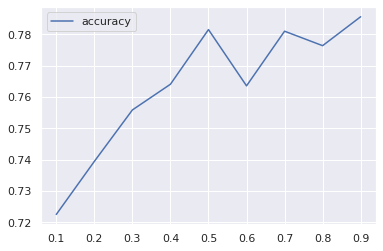

In [ ]:
plt.plot(ms,bag_score,label = "accuracy")
plt.legend()

At 0.9 we got maximum accuracy

**Random Forest**

In [ ]:
###Random Forest Classifier**

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_features = 0.2, n_estimators = 34)
RF.fit(X_train_SM,Y_train_SM)
Y_pred_rf_SM = RF.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test,Y_pred_rf_SM))
print(accuracy_score(Y_test,Y_pred_rf_SM))
print(classification_report(Y_test,Y_pred_rf_SM))

[[ 564  152]
 [ 170 1064]]
0.8348717948717949
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       716
           1       0.88      0.86      0.87      1234

    accuracy                           0.83      1950
   macro avg       0.82      0.82      0.82      1950
weighted avg       0.84      0.83      0.84      1950



In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_SM,Y_train_SM)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [76]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=230, max_features='sqrt', n_estimators=1400)

In [77]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 230,
 'criterion': 'gini'}

In [80]:
best_random_grid=rf_randomcv.best_estimator_

In [81]:
from sklearn.metrics import accuracy_score
y_pred_rf_rs=best_random_grid.predict(X_test)
print(confusion_matrix(Y_test,y_pred_rf_rs))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred_rf_rs)))
print((classification_report(Y_test,y_pred_rf_rs)))

[[ 564  152]
 [ 175 1059]]
Accuracy Score 0.8323076923076923
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       716
           1       0.87      0.86      0.87      1234

    accuracy                           0.83      1950
   macro avg       0.82      0.82      0.82      1950
weighted avg       0.83      0.83      0.83      1950



**Ada Boost Classifier**

In [86]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(base_estimator = dt, n_estimators = 40)
adb.fit(X_train_SM,Y_train_SM)
Y_pred_adb_SM = adb.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_adb_SM))
print(accuracy_score(Y_test,Y_pred_adb_SM))
print(classification_report(Y_test,Y_pred_adb_SM))


[[ 527  189]
 [ 171 1063]]
0.8153846153846154
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       716
           1       0.85      0.86      0.86      1234

    accuracy                           0.82      1950
   macro avg       0.80      0.80      0.80      1950
weighted avg       0.81      0.82      0.81      1950



In [85]:
print(confusion_matrix(Y_test,Y_pred_adb_SM))
print(accuracy_score(Y_test,Y_pred_adb_SM))
print(classification_report(Y_test,Y_pred_adb_SM))

[[ 537  179]
 [ 163 1071]]
0.8246153846153846
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       716
           1       0.86      0.87      0.86      1234

    accuracy                           0.82      1950
   macro avg       0.81      0.81      0.81      1950
weighted avg       0.82      0.82      0.82      1950



In [87]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train_SM,Y_train_SM)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.766772 using {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 500}


In [88]:
best_adb = grid_result.best_estimator_
print(best_adb)

AdaBoostClassifier(n_estimators=500)


In [89]:
best_adb.fit(X_train_SM,Y_train_SM)
y_pred_adb_best = best_adb.predict(X_test)

In [90]:
print(confusion_matrix(Y_test,y_pred_adb_best))
print(accuracy_score(Y_test,y_pred_adb_best))
print(classification_report(Y_test,y_pred_adb_best))

[[511 205]
 [298 936]]
0.742051282051282
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       716
           1       0.82      0.76      0.79      1234

    accuracy                           0.74      1950
   macro avg       0.73      0.74      0.73      1950
weighted avg       0.75      0.74      0.74      1950



**XG Boost**

In [100]:

from xgboost import XGBClassifier
XG = XGBClassifier(learning_rate = 0.14, gamma = 0, reg_lambda = 1, n_estimators = 100)
XG.fit(X_train_SM,Y_train_SM)
Y_pred_XG_SM = XG.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_XG_SM))
print(accuracy_score(Y_test,Y_pred_XG_SM))
print(classification_report(Y_test,Y_pred_XG_SM))

[[536 180]
 [296 938]]
0.7558974358974359
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       716
           1       0.84      0.76      0.80      1234

    accuracy                           0.76      1950
   macro avg       0.74      0.75      0.75      1950
weighted avg       0.77      0.76      0.76      1950



In [101]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"    :  [ 10,20,30,40,50,60,70,80,90,100]
    
}

In [102]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost

In [103]:
XG_classifier=xgboost.XGBClassifier()

In [104]:
XG_search=RandomizedSearchCV(XG_classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [105]:
XG_search.fit(X_train_SM,Y_train_SM)
Y_pred_XG_SM_RS = XG_search.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [106]:
best_xg = XG_search.best_estimator_
print(best_xg)

XGBClassifier(colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=10,
              n_estimators=90)


In [107]:
best_xg.fit(X_train_SM,Y_train_SM)
Y_pred_XG_SM_RS = best_xg.predict(X_test)

In [108]:
print(confusion_matrix(Y_test,Y_pred_XG_SM_RS))
print(accuracy_score(Y_test,Y_pred_XG_SM_RS))
print(classification_report(Y_test,Y_pred_XG_SM_RS))

[[ 531  185]
 [ 171 1063]]
0.8174358974358974
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       716
           1       0.85      0.86      0.86      1234

    accuracy                           0.82      1950
   macro avg       0.80      0.80      0.80      1950
weighted avg       0.82      0.82      0.82      1950



In [110]:
print('Acc_XG_SM:', accuracy_score(Y_test,Y_pred_XG_SM))
print('Acc_ADB_SM:', accuracy_score(Y_test,Y_pred_adb_SM))
print('Acc_RF_SM:', accuracy_score(Y_test,Y_pred_rf_SM))
print('Acc_BAG_SM:', accuracy_score(Y_test,Y_pred_bag_SM))
print('Acc_DT_SM:', accuracy_score(Y_test,Y_pred_dt_SM))
print('Acc_KNN_SM:', accuracy_score(Y_test,Y_pred_knn_SM))

Acc_XG_SM: 0.7558974358974359
Acc_ADB_SM: 0.8153846153846154
Acc_RF_SM: 0.8348717948717949
Acc_BAG_SM: 0.7856410256410257
Acc_DT_SM: 0.7369230769230769
Acc_KNN_SM: 0.7882051282051282


Accuracy of each algorithm without feature selection and with outliers

Acc_XG: 0.7558974358974359

Acc_ADB: 0.8153846153846154

Acc_RF: 0.8348717948717949

Acc_BAG: 0.7856410256410257

Acc_DT: 0.7369230769230769

Acc_KNN: 0.7882051282051282

In [ ]:
def outliers (df , ft) :
    Q1= df[ft].quantile(0.25)
    Q3= df[ft].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound )| (df[ft] > upper_bound )]
    
    return ls

In [ ]:
def remove (df, ls ):
    ls = sorted(set(ls))
    df = df.drop(ls)
    
    return df

In [ ]:
df.columns

In [ ]:
index_list = []
for feature in ['fixed_acidity', 
                'volatile_acidity', 
                'citric_acid', 
                'residual_sugar',
                'chlorides', 
                'free_sulfur_dioxide', 
                'total_sulfur_dioxide', 
                'density',
                'pH', 
                'sulphates', 
                'alcohol', 
                'quality']:
      index_list.extend(outliers(df , feature))

In [ ]:
df1 = remove(df,index_list)

In [ ]:
#Checking the outliers removal
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df1, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.shape, df1.shape

In [ ]:
df1.describe().T

**Feature Selection Algortihm**

In [111]:
#Select K best

X=df2.drop("quality",axis=1)
Y=df2['quality']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Select_KBest_rank_features=SelectKBest(score_func=chi2,k=5)
KBest_features=Select_KBest_rank_features.fit(X,Y)

df_Kscores=pd.DataFrame(KBest_features.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

kbest_features_rank=pd.concat([dfcolumns,df_Kscores],axis=1)

kbest_features_rank.columns=['Features','K_score']
kbest_features_rank

print(kbest_features_rank.nlargest(10,'K_score'))

                Features      K_score
6   total_sulfur_dioxide  1269.974108
5    free_sulfur_dioxide   913.332832
3         residual_sugar   225.657151
10               alcohol   201.369195
1       volatile_acidity    42.528980
11                 style    28.682885
0          fixed_acidity    11.115118
4              chlorides     6.388650
2            citric_acid     3.673977
9              sulphates     1.078473


[0.07921582 0.09979474 0.0822123  0.08277293 0.08258131 0.08571704
 0.08754158 0.09186752 0.08180644 0.08557167 0.13307419 0.00784447]


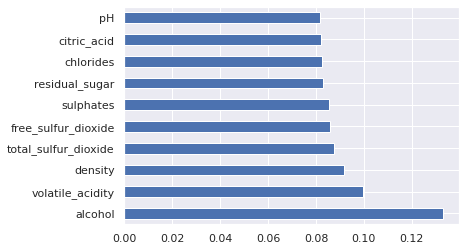

,Features,Score
10,alcohol,0.133074
1,volatile_acidity,0.099795
7,density,0.091868
6,total_sulfur_dioxide,0.087542
5,free_sulfur_dioxide,0.085717
9,sulphates,0.085572
3,residual_sugar,0.082773
4,chlorides,0.082581
2,citric_acid,0.082212
8,pH,0.081806


In [112]:
from sklearn.ensemble import ExtraTreesClassifier
ET_model=ExtraTreesClassifier()
ET_model.fit(X,Y)

print(ET_model.feature_importances_)

import matplotlib.pyplot as plt
ET_ranked_features=pd.Series(ET_model.feature_importances_,index=X.columns)
ET_ranked_features.nlargest(10).plot(kind='barh')
plt.show()


df_ET_rank =pd.DataFrame(ET_model.feature_importances_)

dfcolumns=pd.DataFrame(X.columns)

ET_features_rank=pd.concat([dfcolumns,df_ET_rank],axis=1)

ET_features_rank.columns=['Features','Score']
ET_features_rank
ET_features_rank.nlargest(10,'Score')

density                 0.155593
alcohol                 0.154387
chlorides               0.071535
total_sulfur_dioxide    0.068536
residual_sugar          0.067249
volatile_acidity        0.055987
dtype: float64


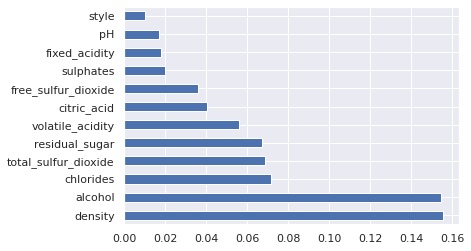

In [113]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,Y)

mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

print(mutual_data.nlargest(6))

mutual_data.nlargest(13).plot(kind='barh')
plt.show()

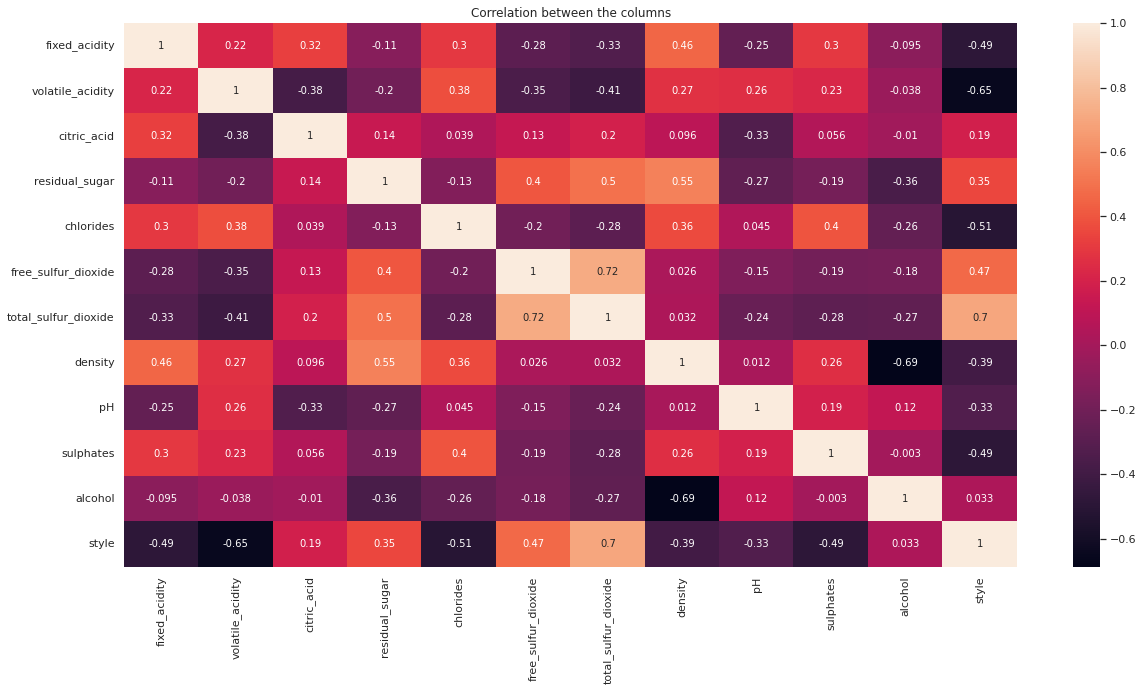

In [119]:
corr = X.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.title("Correlation between the columns")
plt.show()

In [132]:
threshold=-0.3

# find and remove correlated features
def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [133]:
correlation(X,threshold)

{'alcohol',
 'chlorides',
 'citric_acid',
 'density',
 'free_sulfur_dioxide',
 'pH',
 'residual_sugar',
 'style',
 'sulphates',
 'total_sulfur_dioxide',
 'volatile_acidity'}

In [136]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.4 MB/s 


In [137]:
from boruta import BorutaPy

In [138]:
import xgboost as xgb
model = xgb.XGBClassifier

In [153]:
feat_selector = BorutaPy(model, n_estimators='auto')

In [155]:
feat_selector.fit(X_train,Y_train)

TypeError: ignored

TypeError: ignored

In [115]:
df2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [116]:
correlation(df2.iloc[:,:-2],threshold)

{'alcohol',
 'chlorides',
 'citric_acid',
 'density',
 'free_sulfur_dioxide',
 'pH',
 'quality',
 'style',
 'sulphates',
 'total_sulfur_dioxide',
 'volatile_acidity'}